# Yulu Case Study

Yulu, India's leading micro-mobility service provider, aims to tackle traffic congestion by offering shared electric cycles for daily commutes. Facing revenue declines, Yulu seeks insights into the factors influencing demand for their services in the Indian market. The problem definition involves identifying significant variables predicting electric cycle demand and evaluating their effectiveness. Key considerations include:

*  Identifying influential factors impacting electric cycle demand.
*  Assessing the predictive power of these factors in explaining demand patterns.
*  Providing actionable recommendations to enhance service efficiency and address revenue challenges.

# Exploratory Data Analysis

In [90]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

import warnings
warnings.simplefilter('ignore')

In [91]:
# Get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

--2024-03-04 10:43:50--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.160.146.45, 18.160.146.106, 18.160.146.28, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.160.146.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv.2’

bike_sharing.csv.2  100%[===================>] 633.16K  --.-KB/s    in 0.05s   

2024-03-04 10:43:51 (12.2 MB/s) - ‘bike_sharing.csv.2’ saved [648353/648353]



In [92]:
# Reading the dataset

df = pd.read_csv("bike_sharing.csv")
print('Shape of dataset: ',df.shape)
print('Columns in dataset: ',df.columns)

Shape of dataset:  (10886, 12)
Columns in dataset:  Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


**Insights/Conclusion:** Dataset has 10886 rows and 12 columns.


In [93]:
# Null/Missing value check

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [94]:
# Duplicate value check

df.duplicated().sum()

0

**Insights/Conclusion:** The dataset is complete, containing no null, missing or duplicate values across all columns.

In [95]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Column Profiling:**

*  **datetime:** datetime
*  **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
*  **holiday:** whether day is a holiday or not
*  **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
*  **weather:**
  *   1. Clear, Few clouds, partly cloudy, partly cloudy
  *   2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  *   3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  *   4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  **temp:** temperature in Celsius
*  **atemp:** feeling temperature in Celsius
*  **humidity:** humidity
*  **windspeed:** wind speed
*  **casual:** count of casual users
*  **registered:** count of registered users
*  **count:** count of total rental bikes including both casual and registered

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Insights/Conclusion:**

Datatype of following attributes needs to be changed to proper datatype.

* `datetime` to datetime.
* `season`, `holiday`, `workingday` and `weather` to categorical.

In [97]:
df['datetime'] = pd.to_datetime(df['datetime'])

categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
  df[col] = df[col].astype('object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


**Insights/Conclusion:**

* **Datetime column:** `datetime`.

* **Categorical columns:** `season`, `holiday`, `workingday` and `weather`.

* **Numerical columns:** `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered` and `count`.

## Statistical summary

In [99]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


**Insights/Conclusion:**

*  **Data Range:** Data spans from January 1, 2011, to December 19, 2012, capturing nearly two years.
*  **Seasons and Holidays:** There are four seasons and two holiday categories. Most entries are non-holiday and working days.
*  **Weather Conditions:** There are four weather categories. The most frequent condition is likely clear weather.
*  **Temperature and Weather Sensitivity:** Temperature ranges from 0.82°C to 41°C, with an average around 20°C. Humidity and wind speed also vary, impacting bike usage.
*  **User Counts:** Casual and registered user counts vary widely, indicating different user behaviors or trends.
*  **Total Counts:** Total bike usage ranges from 1 to 977, with an average of around 192 rides per hour.
*  **Distribution Statistics:** The median count is 145, suggesting a skewed distribution with some peak usage times.
*  **Potential Outliers:** Maximum counts reach up to 886, implying potential outliers or exceptional usage periods.


## Univariate Analysis

In [100]:
# Unique value counts for each feature

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [101]:
# What is the range of dates in the dataset?

print("Start date:", df['datetime'].min())
print("End date:", df['datetime'].max())
print("Time period:", df['datetime'].max()-df['datetime'].min())

Start date: 2011-01-01 00:00:00
End date: 2012-12-19 23:00:00
Time period: 718 days 23:00:00


In [102]:
# Calculate number of casual users
casual_users = df['casual'].sum()

# Calculate number of registered users
registered_users = df['registered'].sum()

# Calculate total number of users
total_users = df['count'].sum()

# Calculate percentages
casual_percentage = (casual_users / total_users) * 100
registered_percentage = (registered_users / total_users) * 100

print(f'Precentage of Casual users: ', round(casual_percentage,0))
print(f'Precentage of Registered users: ', round(registered_percentage,0))

Precentage of Casual users:  19.0
Precentage of Registered users:  81.0


### Categorical variables analysis

In [103]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [104]:
df['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

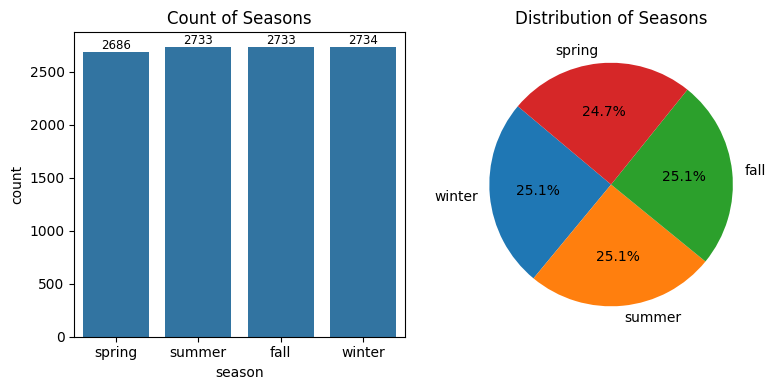

In [105]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Countplot
ax=sns.countplot(x='season', data=df, ax=axs[0])
ax.bar_label(ax.containers[0], fontsize=8.5)
axs[0].set_title('Count of Seasons')

# Pie chart
season_counts = df['season'].value_counts()
axs[1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Seasons')

# Adjust layout
plt.tight_layout()
plt.show()

In [106]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

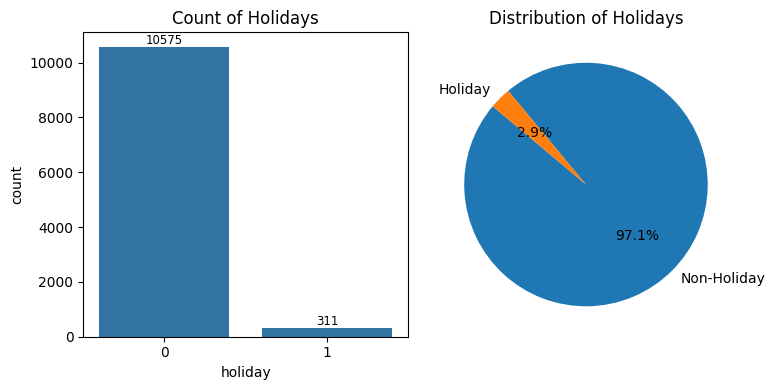

In [107]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Countplot
ax=sns.countplot(x='holiday', data=df, ax=axs[0])
ax.bar_label(ax.containers[0], fontsize=8.5)
axs[0].set_title('Count of Holidays')

# Pie chart
holiday_counts = df['holiday'].value_counts()
axs[1].pie(holiday_counts, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Holidays')

# Adjust layout
plt.tight_layout()
plt.show()

In [108]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

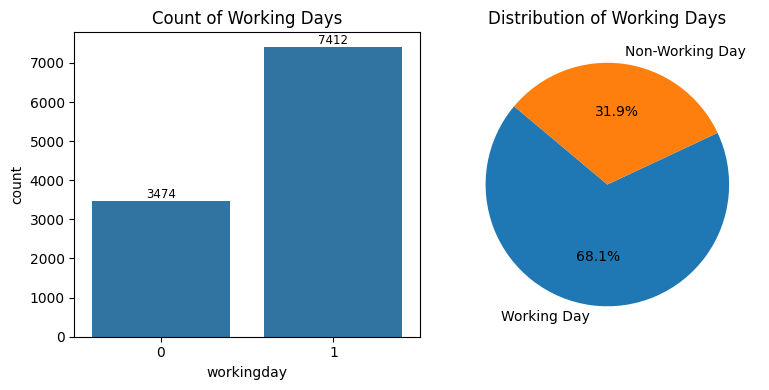

In [109]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Countplot
ax=sns.countplot(x='workingday', data=df, ax=axs[0])
ax.bar_label(ax.containers[0], fontsize=8.5)
axs[0].set_title('Count of Working Days')

# Pie chart
workingday_counts = df['workingday'].value_counts()
axs[1].pie(workingday_counts, labels=['Working Day', 'Non-Working Day'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Working Days')

# Adjust layout
plt.tight_layout()
plt.show()

In [110]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

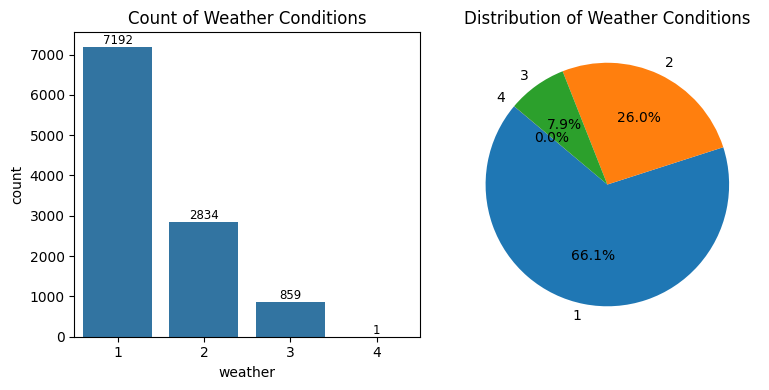

In [111]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Countplot
ax=sns.countplot(x='weather', data=df, ax=axs[0])
ax.bar_label(ax.containers[0], fontsize=8.5)
axs[0].set_title('Count of Weather Conditions')

# Pie chart
weather_counts = df['weather'].value_counts()
axs[1].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Weather Conditions')

# Adjust layout
plt.tight_layout()
plt.show()

**Insights/Conclusion:**

*  **Seasons:** Seasons are evenly distributed, with winter, summer, and fall each having similar counts, while spring has slightly fewer entries.

*  **Holidays:** Majority of the observations are non-holiday days, with only a small fraction being holidays.

*  **Working Days:** There are significantly more observations on working days compared to non-working days.

*  **Weather Conditions:**
  1. Majority of records have clear weather (category 1).
  2. Cloudy weather (category 2) follows, with significantly fewer occurrences.
  3. Light rain/snow (category 3) is less common.
  4. Extreme weather conditions (category 4) are extremely rare, occurring only once.

### Numerical variables analysis

In [112]:
# Summary Statistics - Temperature:

print(df['temp'].describe())

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64


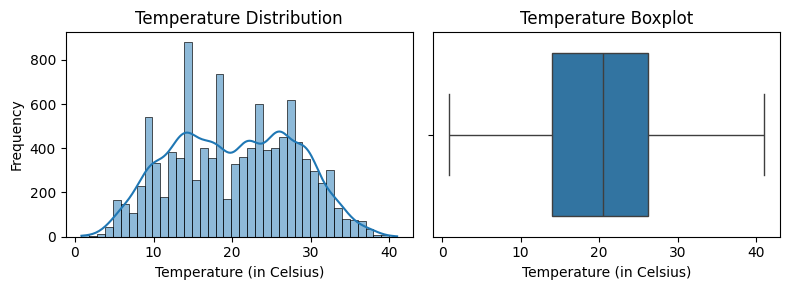

In [113]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='temp', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Temperature Distribution')
axs[0].set_xlabel('Temperature (in Celsius)')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='temp', ax=axs[1])
axs[1].set_title('Temperature Boxplot')
axs[1].set_xlabel('Temperature (in Celsius)')

# Adjust layout
plt.tight_layout()
plt.show()

In [114]:
# Summary Statistics - Feel Temperature:

print(df['atemp'].describe())

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


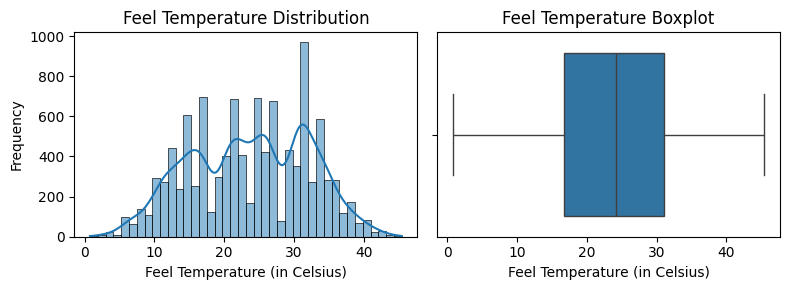

In [115]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='atemp', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Feel Temperature Distribution')
axs[0].set_xlabel('Feel Temperature (in Celsius)')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='atemp', ax=axs[1])
axs[1].set_title('Feel Temperature Boxplot')
axs[1].set_xlabel('Feel Temperature (in Celsius)')

# Adjust layout
plt.tight_layout()
plt.show()

In [116]:
# Summary Statistics - Humidity:

print(df['humidity'].describe())

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64


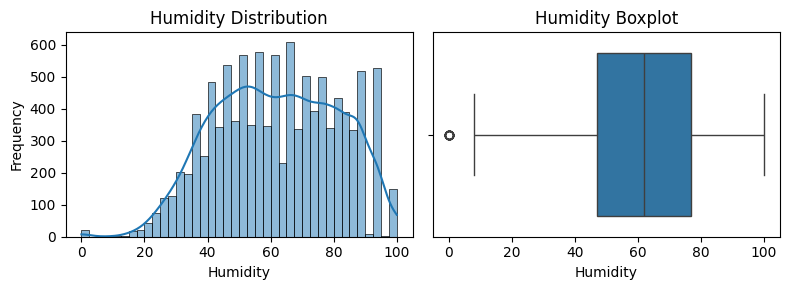

In [117]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='humidity', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Humidity Distribution')
axs[0].set_xlabel('Humidity')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='humidity', ax=axs[1])
axs[1].set_title('Humidity Boxplot')
axs[1].set_xlabel('Humidity')

# Adjust layout
plt.tight_layout()
plt.show()

In [118]:
# Summary Statistics - Windspeed:

print(df['windspeed'].describe())

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


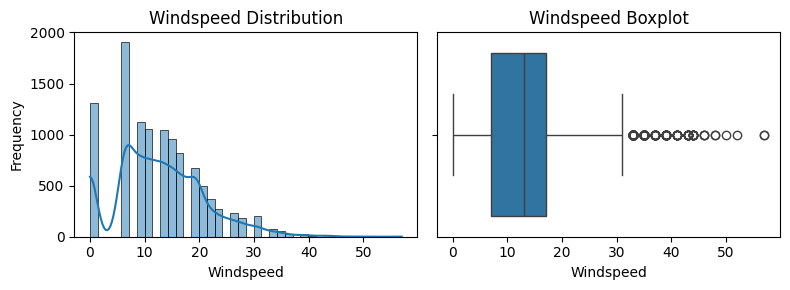

In [119]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='windspeed', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Windspeed Distribution')
axs[0].set_xlabel('Windspeed')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='windspeed', ax=axs[1])
axs[1].set_title('Windspeed Boxplot')
axs[1].set_xlabel('Windspeed')

# Adjust layout
plt.tight_layout()
plt.show()

In [120]:
# Summary Statistics - Casual Users:

print(df['casual'].describe())

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64


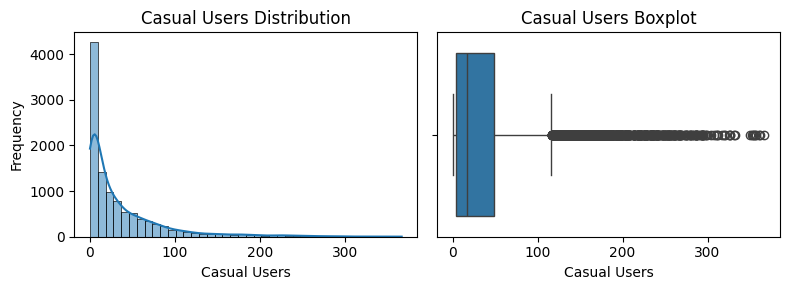

In [121]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='casual', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Casual Users Distribution')
axs[0].set_xlabel('Casual Users')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='casual', ax=axs[1])
axs[1].set_title('Casual Users Boxplot')
axs[1].set_xlabel('Casual Users')

# Adjust layout
plt.tight_layout()
plt.show()

In [122]:
# Summary Statistics - Registered Users:

print(df['registered'].describe())

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64


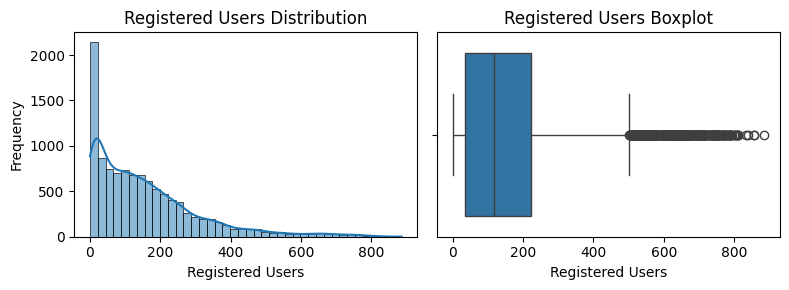

In [123]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='registered', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Registered Users Distribution')
axs[0].set_xlabel('Registered Users')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='registered', ax=axs[1])
axs[1].set_title('Registered Users Boxplot')
axs[1].set_xlabel('Registered Users')

# Adjust layout
plt.tight_layout()
plt.show()

In [124]:
# Summary Statistics - Total Count:

print(df['count'].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


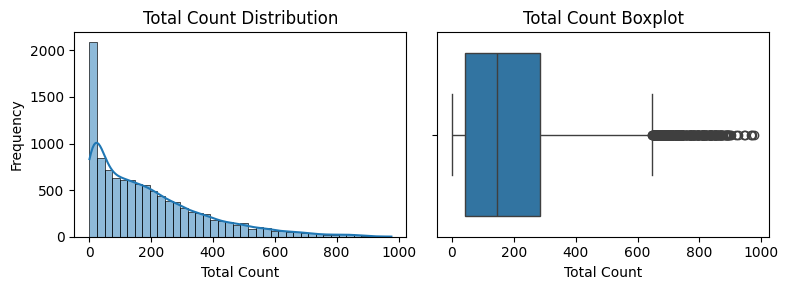

In [125]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Histogram
sns.histplot(data=df, x='count', kde=True, bins=40, ax=axs[0])
axs[0].set_title('Total Count Distribution')
axs[0].set_xlabel('Total Count')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, x='count', ax=axs[1])
axs[1].set_title('Total Count Boxplot')
axs[1].set_xlabel('Total Count')

# Adjust layout
plt.tight_layout()
plt.show()

**Insights/Conclusion:**

1.  **Temperature and Feel Temperature:**

*  Both temperature and feel temperature have approximately normal distributions.
*  Temperature ranges from 0.82°C to 41°C, with a mean of 20.23°C.
*  Feel temperature has a slightly wider range, from 0.76°C to 45.46°C, with a mean of 23.66°C.
*  Temperature and feel temperature do not exhibit significant outliers.


2.  **Humidity:**

*  Humidity follows a relatively normal distribution.
*  Humidity ranges from 0% to 100%, with a mean of 61.89%.
*  Humidity does not show notable outliers except for a potential outlier at 0%.


3.  **Windspeed:**

*  Windspeed appears to have a right-skewed distribution.
*  Windspeed ranges from 0 to 56.9979, with a mean of 12.80.
*  Extreme windspeed outliers are observed, which could occur during storms, cyclones, or other severe weather events.


4.  **Casual and Registered Users:**

*  Both casual and registered user counts have right-skewed distributions.
*  Casual user counts range from 0 to 367, with a mean of 36.02.
*  Registered user counts range from 0 to 886, with a mean of 155.55.
*  Outliers are observed on the higher end for both casual and registered users, which could be due to special events, holidays, marketing campaigns, or anomalies in data collection.


5.  **Total Count (Bike Rentals):**

*  Total count (bike rentals) also exhibits a right-skewed distribution.
*  Bike rentals range from 1 to 977, with a mean of 191.57.
*  Outliers are observed on the higher end of bike rentals, which colud occur due to peak hours, weekends, holidays, or special events.


## Bivariate Analysis

In [126]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
summary_stats = {}

for col in categorical_columns:
    stats = df.groupby(col)['count'].describe()
    summary_stats[col] = stats

# Print summary statistics
for col, stats in summary_stats.items():
    print(f"Summary Statistics for {col.capitalize()} vs Count:")
    print(stats)
    print()

Summary Statistics for Season vs Count:
         count        mean         std  min   25%    50%    75%    max
season                                                                
fall    2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
spring  2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
summer  2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
winter  2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

Summary Statistics for Holiday vs Count:
           count        mean         std  min   25%    50%    75%    max
holiday                                                                 
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0

Summary Statistics for Workingday vs Count:
             count        mean         std  min   25%    50%    75%    max
workingday                                                                
0    

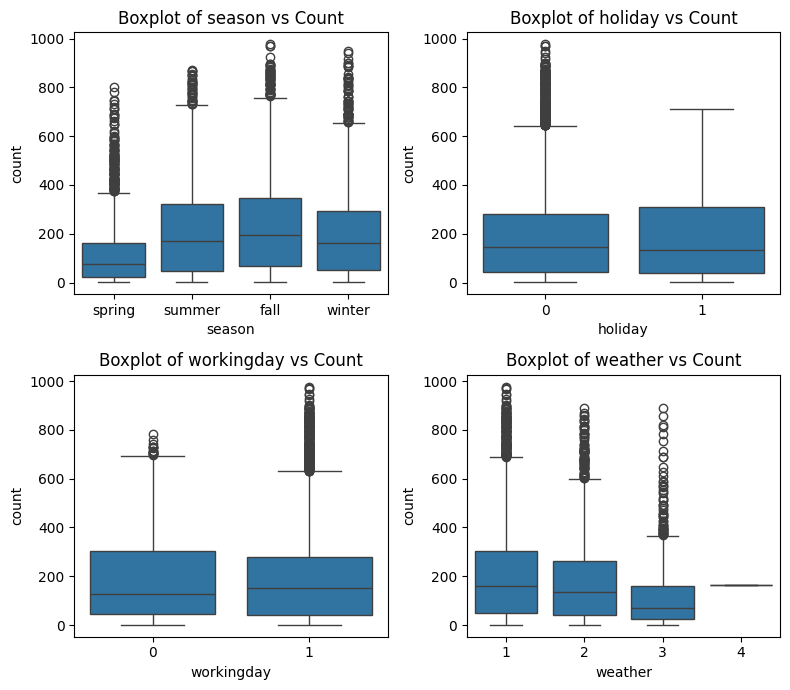

In [127]:
# Plotting categorical variables againt count using boxplots

plt.figure(figsize=(8, 7))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='count', data=df)
    plt.title(f'Boxplot of {col} vs Count')
plt.tight_layout()
plt.show()

**Insights/Conclusion:**

*  **Season:** Fall has the highest mean count, while spring has the lowest. Season significantly impacts bike rental demand.

*  **Holiday:**  Counts dip slightly on holidays, but overall demand remains relatively stable throughout.

*  **Workingday:** Demand is consistent on working days, with slightly higher counts compared to non-working days.

*  **Weather:** Clear weather correlates with higher bike rentals, while severe weather conditions correlate with lower rentals. Weather strongly influences demand patterns.

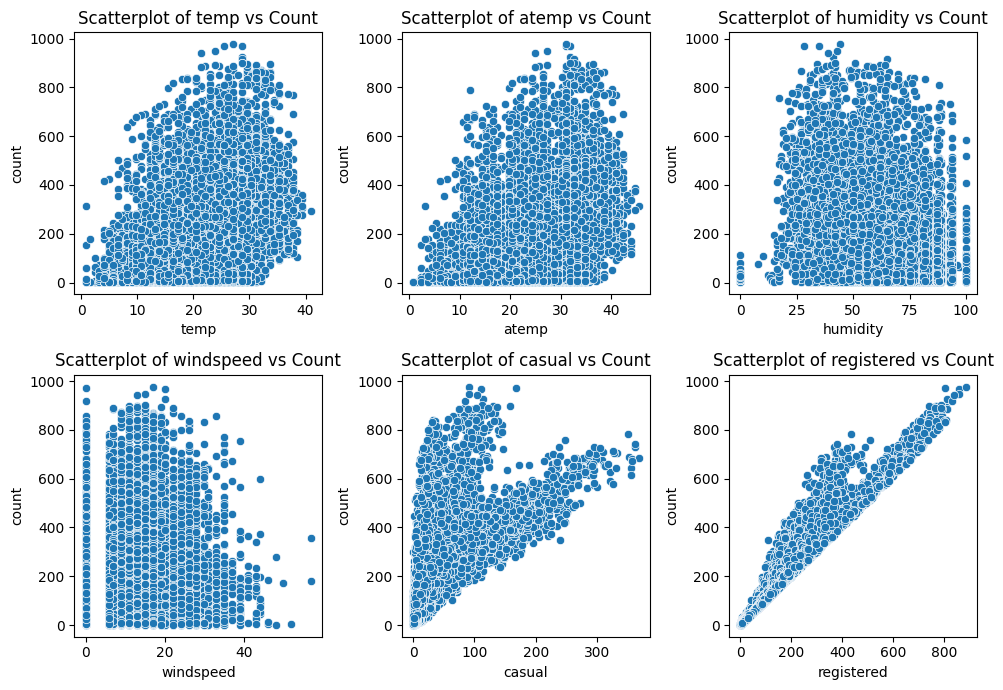

In [128]:
# Plotting numerical variables againt count using boxplots

numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

plt.figure(figsize=(10, 7))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='count', data=df)
    plt.title(f'Scatterplot of {col} vs Count')
plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*  Whenever the temperature is less than 10, number of bikes rented is less.
*  Whenever the humidity is less than 20, number of bikes rented is very very low.
*  Whenever the windspeed is greater than 35, number of bikes rented is less.
*  Count of total rental bikes increases as the number of users increases.

## Multivariate Analysis

[]

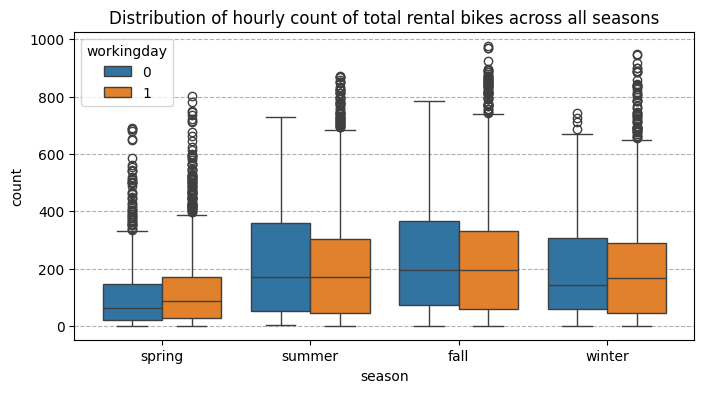

In [129]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday')
plt.title('Distribution of hourly count of total rental bikes across all seasons')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

[]

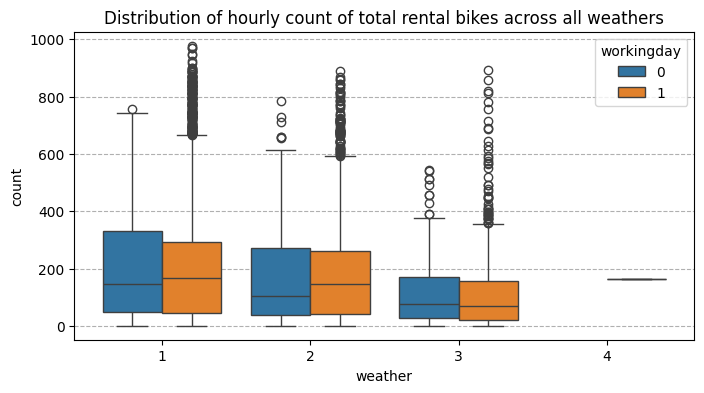

In [130]:
plt.figure(figsize = (8, 4))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

 **Insights/Conclusion:**

*  The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

*  The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

*  The median count of rental bikes is higher on working days than non-working days, indicating a consistent trend of higher usage on working.

*  The standard deviation shows wider spread during working days, indicating more variability in usage patterns.

## Datetime Analysis


In [131]:
# Setting the 'datetime' column as the index of the DataFrame 'df'
# It allows for easier and more efficient access, filtering, and manipulation of the data based on the datetime values.
# It enables operations such as resampling, slicing by specific time periods, and applying time-based calculations.

df.set_index('datetime', inplace = True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


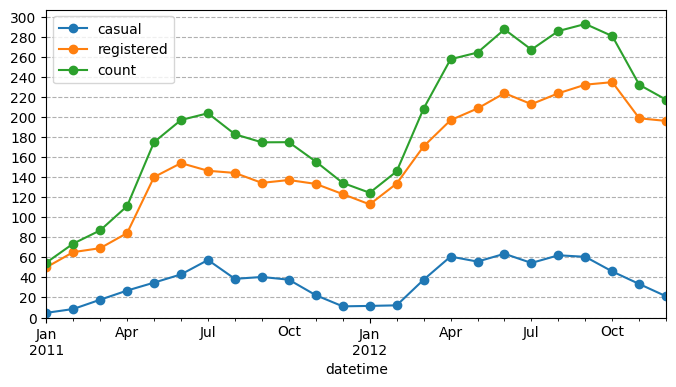

In [132]:
# The trend of the monthly average values for the 'casual', 'registered', and 'count' variables over time

plt.figure(figsize = (8, 4))

# Plotting a lineplot by resampling the data on a monthly basis.
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)                              # setting the lower y-axis limit to 0
plt.show()

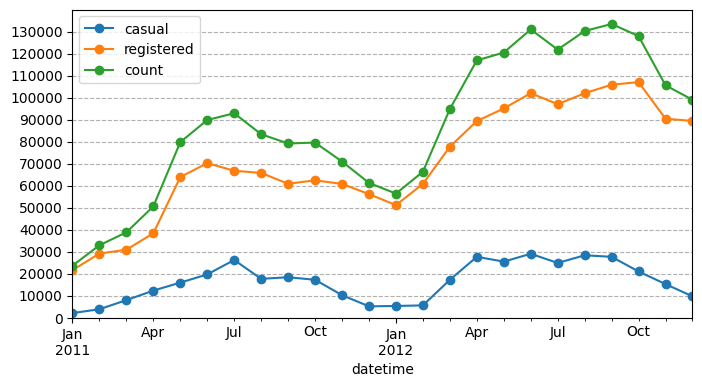

In [133]:
# The trend of the monthly total values for the 'casual', 'registered', and 'count' variables over time

plt.figure(figsize = (8, 4))

# Plotting a lineplot by resampling the data on a monthly basis.
df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')      # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)                                # setting the lower y-axis limit to 0
plt.show()

**Insights/Conclusion:**

Overall, there's a gradual increase in bike rentals over the two years.

#### Is there an increase in the average hourly count of rental bikes from the year 2011 to 2012?

In [134]:
# Resampling the DataFrame by the year
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up
# to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


**Insights/Conclusion:**

*  The data reveals significant growth in the rental bike count throughout the span of a year.
*  Average hourly bike rentals stand at 144 in 2011 and 239 in 2012, showing a remarkable 65.41% annual growth rate.

*These findings suggest a positive trend with a notable increase in demand for rental bikes.*

In [135]:
# Resetting the index of the DataFrame

df.reset_index(inplace = True)

#### How does the average hourly count of rental bikes varies for different months?

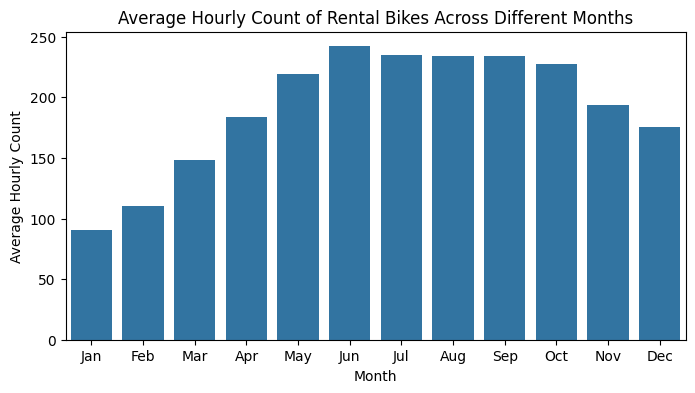

In [136]:
# Grouping by month and calculating the mean count
monthly_average_count = df.groupby(df['datetime'].dt.month)['count'].mean()

# Plotting the average hourly count variation across different months
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_average_count.index, y=monthly_average_count.values)
plt.title('Average Hourly Count of Rental Bikes Across Different Months')
plt.xlabel('Month')
plt.ylabel('Average Hourly Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [137]:
# Grouping the DataFrame by the month
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
# to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


**Insights/Conclusion:**

*  Rental bike demand peaks in June, July, and August, while it hits its lowest point in January, February, and March, indicating a seasonal pattern.
*  There's a steady rise from January to March (34.70% growth), followed by stabilization until June, slight decline until September, and a significant drop from October to December (-14.94%).

*These trends reveal a clear seasonal pattern in rental bike demand, recognizing them can aid the rental company in optimizing resource allocation, refining marketing strategies, and planning operations effectively year-round.*

#### What is the distribution of average count of rental bikes across days of the week?

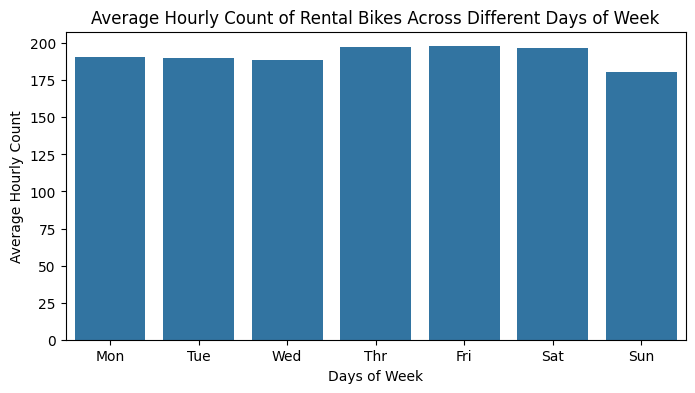

In [138]:
# Grouping by days of week and calculating the mean count
dayofweek_average_count = df.groupby(df['datetime'].dt.dayofweek)['count'].mean()

# Plotting the average hourly count variation across different days of week
plt.figure(figsize=(8, 4))
sns.barplot(x=dayofweek_average_count.index, y=dayofweek_average_count.values)
plt.title('Average Hourly Count of Rental Bikes Across Different Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Average Hourly Count')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun'])
plt.show()

In [139]:
# Grouping the DataFrame by the days of week
df2 = df.groupby(by = df['datetime'].dt.dayofweek)['count'].mean().reset_index()
df2.rename(columns = {'datetime' : 'dayofweek'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
# to compare the previous day of week count with the current day of week count
df2['prev_count'] = df2['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous day of week
df2['growth_percent'] = (df2['count'] - df2['prev_count']) * 100 / df2['prev_count']
df2.set_index('dayofweek', inplace = True)
df2

,count,prev_count,growth_percent
dayofweek,,,
0,190.390716,NaN,NaN
1,189.723847,190.390716,-0.350263
2,188.411348,189.723847,-0.691794
3,197.296201,188.411348,4.715668
4,197.844343,197.296201,0.277827
5,196.665404,197.844343,-0.595892
6,180.839772,196.665404,-8.046983


**Insights/Conclusion:**

*  Count is highest on Thursday, followed by Friday, with a slight decrease towards the weekend.
*  The average hourly count fluctuates slightly, with Thursday showing a slight increase of 4.72%, while Sunday shows the largest negative growth of -8.05%, indicating a significant decrease from Saturday.

*The study reveals varying demand for rental bikes on different days of the week, suggesting potential for targeted marketing strategies or operational adjustments to optimize resource allocation.*

#### What is the distribution of average count of rental bikes on an hourly basis in a single day ?

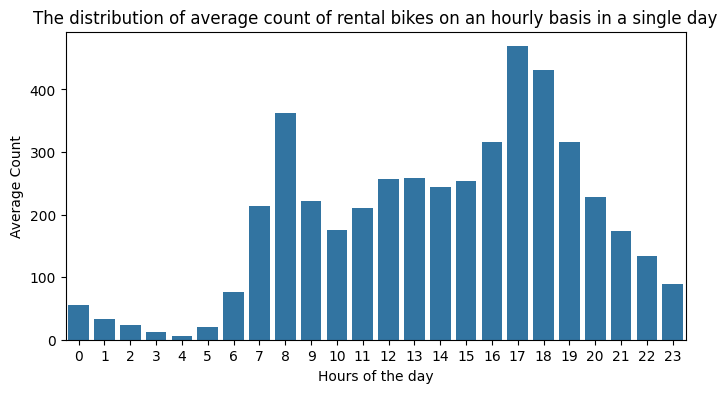

In [140]:
# Grouping by hour and calculating the mean count
hour_average_count = df.groupby(df['datetime'].dt.hour)['count'].mean()

# Plotting the average count of rental bikes on an hourly basis in a single day
plt.figure(figsize=(8, 4))
sns.barplot(x=hour_average_count.index, y=hour_average_count.values)
plt.title('The distribution of average count of rental bikes on an hourly basis in a single day')
plt.xlabel('Hours of the day')
plt.ylabel('Average Count')
plt.show()

In [141]:
# Grouping the DataFrame by the hour
df3 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df3.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
# to compare the previous hour's count with the current hour's count
df3['prev_count'] = df3['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df3['growth_percent'] = (df3['count'] - df3['prev_count']) * 100 / df3['prev_count']
df3.set_index('hour', inplace = True)
df3

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


**Insights/Conclusion:**

*  The rental bike count peaks during morning rush hours at 8 AM, with an average count of 362.77, indicating high demand for work commutes.
*  Similarly, evening rush hours at 5 PM and 6 PM show high counts of 468.77 and 430.86, reflecting work-related home returns.
*  Late-night hours, particularly between 1 AM and 5 AM, show minimal usage.

*These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.*

## Relationship between the Dependent and Independent Variables.

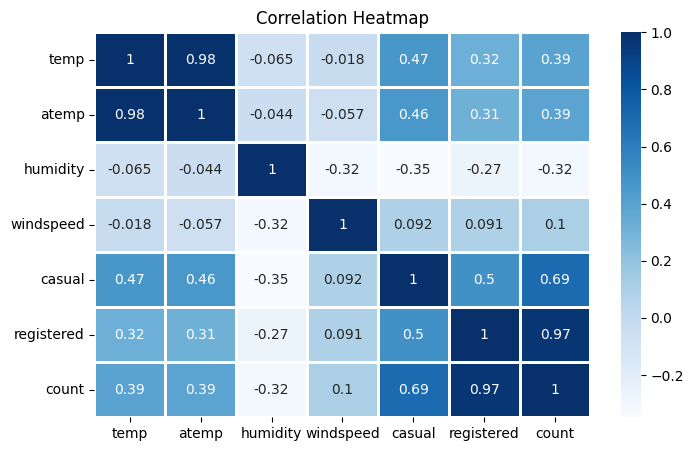

In [142]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',edgecolors='black',linewidths=0.8)
plt.title('Correlation Heatmap')

plt.show()

**Insights/Conclusion:**

*  There is a very high correlation (> 0.9) between **atemp** and **temp**, indicating they essentially provide the same information.
*  Notably, **count** and **registered** exhibit a very high correlation (> 0.9), suggesting registered users significantly contribute to the total rental count.
*  Moderate positive correlations (0.5 - 0.7) are observed between **casual** and **count**, underlining the impact of casual rentals on overall demand.
*  Weather factors like **temperature** and **humidity** moderately affect bike rental **count**, while windspeed shows a weak influence.
*  Interestingly, **casual** rentals are moderately correlated with **temp**, suggesting weather perception affects casual users more than registered users.
*  Overall, **registered users** play a dominant role in rental demand, while **weather** factors moderately influence rental counts.

# Hypothesis Testing

## Is there any significant difference between the no. of bike rides on Weekdays and Weekends?

[]

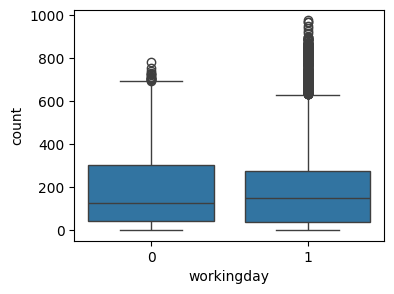

In [143]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

1. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):**

  **Null Hypothesis:** Working day has no effect on the number of cycles being rented.

  **Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

2. **Select an appropriate test:** We will use 2-Sample Independent T-test.

3. **Significance level (alpha):** 0.05

4.  **Calculate test Statistics / p-value:**



In [144]:
weekend_counts = df[df['workingday']==0]['count'].values
weekday_counts = df[df['workingday']==1]['count'].values

In [145]:
np.mean(weekend_counts),np.mean(weekday_counts)

(188.50662061024755, 193.01187263896384)

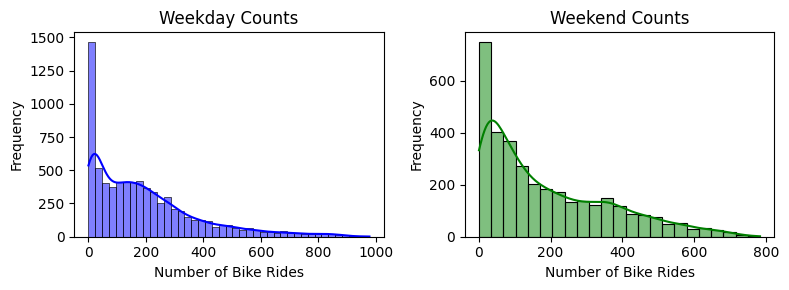

In [146]:
plt.figure(figsize=(8, 3))

# Plot histogram for weekday counts
plt.subplot(1, 2, 1)
sns.histplot(weekday_counts, color='blue', kde=True)
plt.title('Weekday Counts')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')

# Plot histogram for weekend counts
plt.subplot(1, 2, 2)
sns.histplot(weekend_counts, color='green', kde=True)
plt.title('Weekend Counts')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [147]:
# Generate sample means for weekend
weekend_sample_means = np.mean(np.random.choice(weekend_counts, size=(1000, 30)), axis=1)

# Generate sample means for weekdays
weekday_sample_means = np.mean(np.random.choice(weekday_counts, size=(1000, 30)), axis=1)

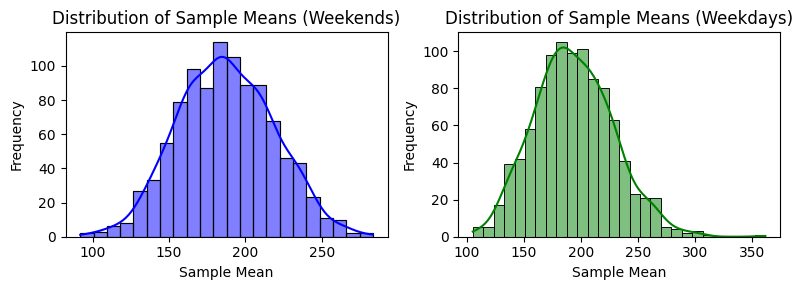

In [148]:
# Plot the distributions of sample means
plt.figure(figsize=(8, 3))

# Plot histogram for weekday counts
plt.subplot(1, 2, 1)
sns.histplot(weekend_sample_means, color='blue', kde=True)
plt.title('Distribution of Sample Means (Weekends)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# Plot histogram for weekend counts
plt.subplot(1, 2, 2)
sns.histplot(weekday_sample_means, color='green', kde=True)
plt.title('Distribution of Sample Means (Weekdays)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [149]:
# Performing T-test

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(weekday_counts, weekend_counts)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.2096277376026694
P-value: 0.22644804226361348


5.  **alpha (0.05) < p-value (0.22):** Since pvalue is greater than alpha, so we fail to reject the Null hypothesis.

6.  **Conclusion:** The number of cycles being rented is statistically same for both working and non-working days .

## The demand of bicycles on rent is same for different Weather conditions?

[]

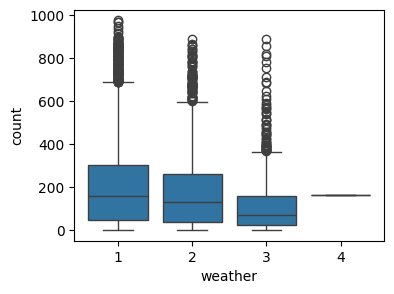

In [150]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x = 'weather', y = 'count')
plt.plot()

1. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):**

  **Null Hypothesis:** Weather has no effect on the number of cycles being rented.

  **Alternate Hypothesis:** Weather has a sigificant effect on the number of cycles being rented.

2. **Select an appropriate test:** We will use One-way ANOVA test.

3. **Significance level (alpha):** 0.05


In [151]:
df_weather1 = df[df['weather'] == 1]['count'].values
df_weather2 = df[df['weather'] == 2]['count'].values
df_weather3 = df[df['weather'] == 3]['count'].values
df_weather4 = df[df['weather'] == 4]['count'].values
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

In [152]:
np.mean(df_weather1), np.mean(df_weather2), np.mean(df_weather3), np.mean(df_weather4)

(205.23679087875416, 178.95553987297106, 118.84633294528521, 164.0)

**Note:** We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group.

4. **Check assumptions of the test:**


***Visual Tests to know if the samples follow normal distribution***

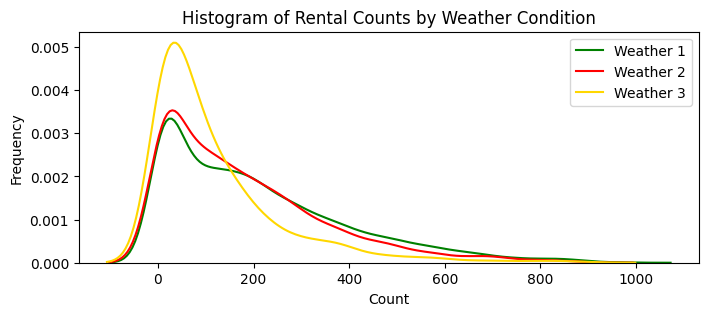

In [153]:
# Histogram
plt.figure(figsize=(8, 3))
sns.kdeplot(df_weather1, label='Weather 1', color='green')
sns.kdeplot(df_weather2, label='Weather 2', color='red')
sns.kdeplot(df_weather3, label='Weather 3', color='gold')
plt.title('Histogram of Rental Counts by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*  It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

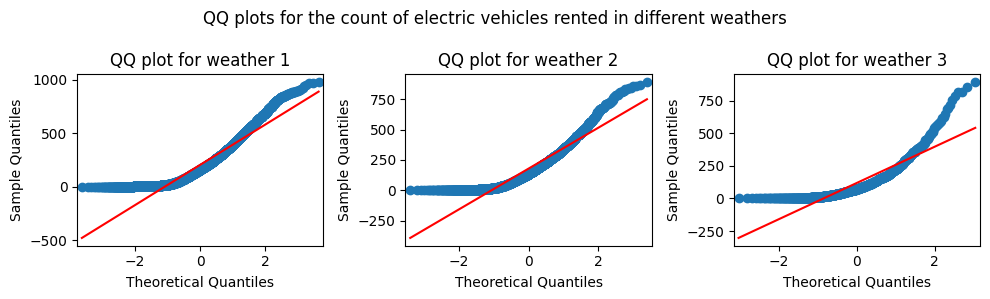

In [154]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(10, 3))
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')

plt.subplot(1, 3, 1)
qqplot(df_weather1, line="s", ax=plt.gca())
plt.title('QQ plot for weather 1')

plt.subplot(1, 3, 2)
qqplot(df_weather2, line="s", ax=plt.gca())
plt.title('QQ plot for weather 2')

plt.subplot(1, 3, 3)
qqplot(df_weather3, line="s", ax=plt.gca())
plt.title('QQ plot for weather 3')

plt.tight_layout()
plt.show()

*  It can be inferred from the above plot that the distributions do not follow normal distribution.

***Skewness & Kurtosis***

In [155]:
from scipy.stats import skew, kurtosis

print("Skewness of Weather 1:", skew(df_weather1))
print("Kurtosis of Weather 1:", kurtosis(df_weather1))
print("Skewness of Weather 2:", skew(df_weather2))
print("Kurtosis of Weather 2:", kurtosis(df_weather2))
print("Skewness of Weather 3:", skew(df_weather3))
print("Kurtosis of Weather 3:", kurtosis(df_weather3))

Skewness of Weather 1: 1.1396195185041555
Kurtosis of Weather 1: 0.9632151489948488
Skewness of Weather 2: 1.293759189703101
Kurtosis of Weather 2: 1.5835130178554868
Skewness of Weather 3: 2.1833160390123187
Kurtosis of Weather 3: 5.961191782478394


*  Weather 3 has the highest skewness and kurtosis, indicating a significant deviation from normality.
*  Weather 1 and 2 exhibit moderate skewness, suggesting non-normal distributions but with less extreme tails.

***Shapiro-Wilk test for normality***

$H_0$ : The sample follows normal distribution

$H_1$ : The sample does not follow normal distribution

**alpha** = 0.05

In [156]:
from scipy.stats import shapiro

shapiro_stat1, shapiro_pvalue1 = shapiro(df_weather1)
shapiro_stat2, shapiro_pvalue2 = shapiro(df_weather2)
shapiro_stat3, shapiro_pvalue3 = shapiro(df_weather3)

print("Shapiro-Wilk's test for Weather 1 - p-value:", shapiro_pvalue1)
print("Shapiro-Wilk's test for Weather 2 - p-value:", shapiro_pvalue2)
print("Shapiro-Wilk's test for Weather 3 - p-value:", shapiro_pvalue3)

Shapiro-Wilk's test for Weather 1 - p-value: 0.0
Shapiro-Wilk's test for Weather 2 - p-value: 9.781063280987223e-43
Shapiro-Wilk's test for Weather 3 - p-value: 3.876090133422781e-33


*  **p-value for all three cases < alpha**, so we reject null hypothesis. Therefore, samples does not follow normal distribution.

***Homogeneity of Variances using Levene's test***

$H_0$ : Variances are equal

$H_1$ : Variances are not equal

**alpha** = 0.05

In [157]:
from scipy.stats import levene

levene_stat, levene_pvalue = levene(df_weather1, df_weather2, df_weather3)
print("Levene's test p-value:", levene_pvalue)

Levene's test p-value: 6.198278710731511e-36


*  **p-value < alpha**, so we reject null hypothesis. Therefore, Variances are not equal.

Since the samples are not normally distributed and do not have the same variance, **f_oneway test cannot** be performed here, we can perform its non parametric equivalent test.

5.  ***Kruskal-Wallis test for independent samples***

  $H_0$ : Mean no. of cycles rented is same for different weather

  $H_1$ : Mean no. of cycles rented is different for different weather

  **alpha** = 0.05

In [158]:
from scipy.stats import kruskal

test_stat, p_value = kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45


6.  **p-value < alpha (0.05)**, so we reject null hypothesis.

7.  **Conclusion:** The average number of rental bikes is statistically different for different weathers.

## The demand of bicycles on rent is the same for different Seasons?

[]

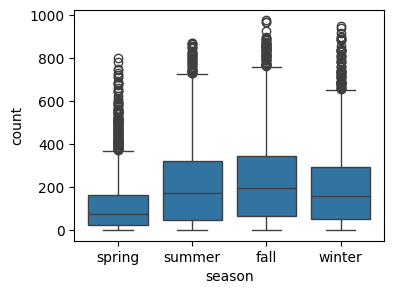

In [159]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x = 'season', y = 'count')
plt.plot()

1. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):**

  **Null Hypothesis:** Season has no effect on the number of cycles being rented.

  **Alternate Hypothesis:** Season has a sigificant effect on the number of cycles being rented.

2. **Select an appropriate test:** We will use One-way ANOVA test.

3. **Significance level (alpha):** 0.05


In [160]:
df_season_spring = df[df['season'] == 'spring']['count'].values
df_season_summer = df[df['season'] == 'summer']['count'].values
df_season_fall = df[df['season'] == 'fall']['count'].values
df_season_winter = df[df['season'] == 'winter']['count'].values
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

In [161]:
np.mean(df_season_spring), np.mean(df_season_summer), np.mean(df_season_fall), np.mean(df_season_winter)

(116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374)

4. **Check assumptions of the test:**


***Visual Tests to know if the samples follow normal distribution***

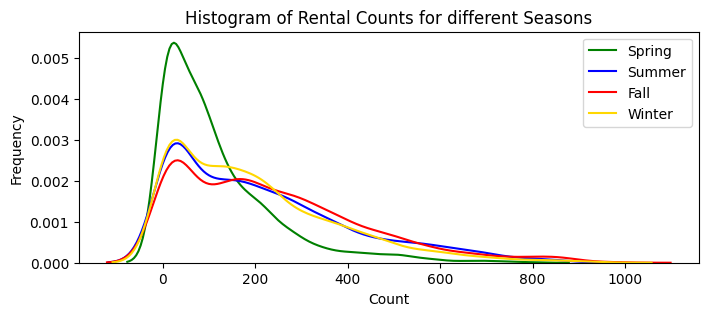

In [162]:
# Histogram
plt.figure(figsize=(8, 3))
sns.kdeplot(df_season_spring, label='Spring', color='green')
sns.kdeplot(df_season_summer, label='Summer', color='blue')
sns.kdeplot(df_season_fall, label='Fall', color='red')
sns.kdeplot(df_season_winter, label='Winter', color='gold')
plt.title('Histogram of Rental Counts for different Seasons')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*  It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

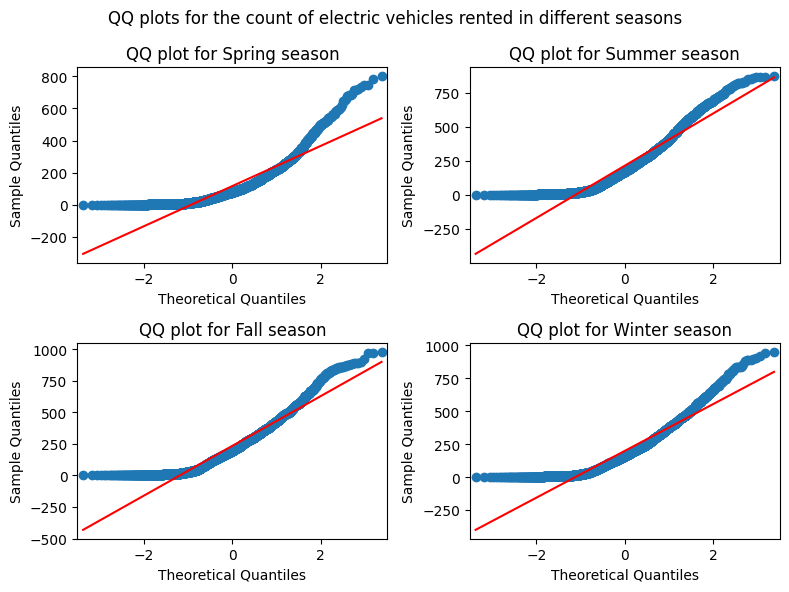

In [163]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(8, 6))
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')

plt.subplot(2, 2, 1)
qqplot(df_season_spring, line="s", ax=plt.gca())
plt.title('QQ plot for Spring season')

plt.subplot(2, 2, 2)
qqplot(df_season_summer, line="s", ax=plt.gca())
plt.title('QQ plot for Summer season')

plt.subplot(2, 2, 3)
qqplot(df_season_fall, line="s", ax=plt.gca())
plt.title('QQ plot for Fall season')

plt.subplot(2, 2, 4)
qqplot(df_season_winter, line="s", ax=plt.gca())
plt.title('QQ plot for Winter season')
plt.tight_layout()
plt.show()

*  It can be inferred from the above plot that the distributions do not follow normal distribution.

***Skewness & Kurtosis***

In [164]:
from scipy.stats import skew, kurtosis

print("Skewness of Spring season:", skew(df_season_spring))
print("Kurtosis of Spring season:", kurtosis(df_season_spring))
print("Skewness of Summer season':", skew(df_season_summer))
print("Kurtosis of Summer season':", kurtosis(df_season_summer))
print("Skewness of Fall season:", skew(df_season_fall))
print("Kurtosis of Fall season:", kurtosis(df_season_fall))
print("Skewness of Winter season:", skew(df_season_winter))
print("Kurtosis of Winter season:", kurtosis(df_season_winter))

Skewness of Spring season: 1.8870013494363214
Kurtosis of Spring season: 4.30449666648592
Skewness of Summer season': 1.0027135037743604
Kurtosis of Summer season': 0.4222412657621657
Skewness of Fall season: 0.9909503852121176
Kurtosis of Fall season: 0.6959091337333851
Skewness of Winter season: 1.1714741534595685
Kurtosis of Winter season: 1.2689637849725477


*  Spring season exhibits the highest skewness and kurtosis among all seasons, indicating a more pronounced and peaked distribution compared to others.
*  Summer and Fall seasons display relatively lower skewness and kurtosis, suggesting more symmetric and less peaked distributions compared to Spring and Winter.

***Shapiro-Wilk test for normality***

$H_0$ : The sample follows normal distribution

$H_1$ : The sample does not follow normal distribution

**alpha** = 0.05

In [165]:
from scipy.stats import shapiro

shapiro_stat1, shapiro_pvalue1 = shapiro(df_season_spring)
shapiro_stat2, shapiro_pvalue2 = shapiro(df_season_summer)
shapiro_stat3, shapiro_pvalue3 = shapiro(df_season_fall)
shapiro_stat4, shapiro_pvalue4 = shapiro(df_season_winter)

print("Shapiro-Wilk's test for Spring season - p-value:", shapiro_pvalue1)
print("Shapiro-Wilk's test for Summer season - p-value:", shapiro_pvalue2)
print("Shapiro-Wilk's test for Fall season - p-value:", shapiro_pvalue3)
print("Shapiro-Wilk's test for Winter season - p-value:", shapiro_pvalue4)

Shapiro-Wilk's test for Spring season - p-value: 0.0
Shapiro-Wilk's test for Summer season - p-value: 6.039093315091269e-39
Shapiro-Wilk's test for Fall season - p-value: 1.043458045587339e-36
Shapiro-Wilk's test for Winter season - p-value: 1.1301682309549298e-39


*  **p-value for all four cases < alpha**, so we reject null hypothesis. Therefore, samples does not follow normal distribution.

***Homogeneity of Variances using Levene's test***

$H_0$ : Variances are equal

$H_1$ : Variances are not equal

**alpha** = 0.05

In [166]:
from scipy.stats import levene

levene_stat, levene_pvalue = levene(df_season_spring, df_season_summer, df_season_fall, df_season_winter)
print("Levene's test p-value:", levene_pvalue)

Levene's test p-value: 1.0147116860043298e-118


*  **p-value < alpha**, so we reject null hypothesis. Therefore, Variances are not equal.

Since the samples are not normally distributed and do not have the same variance, **f_oneway test cannot** be performed here, we can perform its non parametric equivalent test.

5.  ***Kruskal-Wallis H-test for independent samples***

  $H_0$ : Mean no. of cycles rented is same for different seasons

  $H_1$ : Mean no. of cycles rented is different for different seasons

  **alpha** = 0.05

In [167]:
from scipy.stats import kruskal

test_stat, p_value = kruskal(df_season_spring, df_season_summer, df_season_fall, df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


6.  **p-value < alpha (0.05)**, so we reject null hypothesis.

7.  **Conclusion:** The average number of rental bikes is statistically different for different seasons.

## The Weather conditions are significantly different during different Seasons?

In [168]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


*  It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

1. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):**

  **Null Hypothesis:** Weather is independent of the season.

  **Alternate Hypothesis:** Weather is dependent of the season.

2. **Select an appropriate test:** We will use the Chi- square test.

3.  Create a **Contingency Table** against 'Weather' & 'Season' columns.

In [169]:
cross_table = pd.crosstab(df['season'], df['weather'])
cross_table

weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


**Note:** Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [170]:
# Filter the DataFrame to exclude weather condition 4
filtered_df = df[df['weather'] != 4]

# Create the contingency table
cross_table = pd.crosstab(filtered_df['season'], filtered_df['weather'])
cross_table

weather,1,2,3
season,,,
fall,1930,604,199
spring,1759,715,211
summer,1801,708,224
winter,1702,807,225



4. **Significance level (alpha):** 0.05

5. **Calculate test Statistics / p-value:**

In [171]:
# Perform chi-square test

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 46.10145731073249
p-value: 2.8260014509929343e-08
Degrees of freedom: 6
Expected frequencies table:
[[1805.76352779  711.55920992  215.67726229]
 [1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]


6.  **p-value < alpha (0.05)**, so we reject null hypothesis.

7.  **Conclusion:** Weather and season are statistically dependent based on the number of number of bikes rented.

# Insights


*  The dataset spans from January 1, 2011, to December 19, 2012, encompassing 718 days.
*  Casual users constitute 19% while registered users comprise 81% of total users.
*  Over the two-year period, the mean hourly count of rental bikes increased from 144 in 2011 to 239 in 2012, indicating a 65.41% annual growth rate.
*  Rental bike demand exhibits a seasonal pattern, peaking in spring and summer, declining slightly in fall, and further decreasing in winter.
*  Highest average hourly bike counts occur in June, July, and August..
*  Lowest average hourly bike counts occur in January, February, and March.
*  Hourly counts fluctuate throughout the day, with peaks during morning (8 AM) and evening (5 PM - 6 PM) rush hours and lows during nighttime (1 AM to 5 AM).
*  Lower temperatures below 10°C correspond to reduced bike rentals, suggesting a preference for warmer weather among users.
*  Extremely low humidity levels below 20% correlate with significantly decreased bike rentals, indicating unfavorable riding conditions.
*  Higher windspeeds exceeding 35 km/h are associated with reduced bike rentals, possibly due to safety concerns or discomfort for riders.
*  Rental bike counts demonstrate a positive correlation with the number of users, highlighting increased demand with higher user engagement.
*  Clear and cloudy weather conditions correlate with higher bike rental counts compared to misty and rainy weather.
*  Rental bike demand remains consistent between working and non-working days.
*  Weather significantly influences the average number of rental bikes, varying across different weather conditions.
*  Seasonal variations significantly impact the average rental bike count, with distinct patterns observed throughout the year.
*  Statistical analysis confirms a dependency between weather and season on rental bike demand, emphasizing the importance of considering these factors in strategic planning.

# Recommendations

*  **Seasonal Marketing:** A clear seasonal pattern is observed in the count of rental bikes. So, Yulu can adjust its marketing strategies based on it, focusing on promoting rentals during spring and summer months with seasonal discounts or special packages.

*  **Dynamic Pricing:** Since there is an hourly fluctuation in bike rental counts throughout the day. Implement time-based pricing for bike rentals, lower rates during off-peak hours and higher during peak hours, to balance demand and optimize resources.

*  **Weather-driven Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Offer weather-specific discounts to attract more Yulu customers.

*  **User Segmentation:** Recognizing that most users are registered (81%) and fewer are casual (19%). Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

*  **Optimize Inventory:** Analyze monthly demand and adjust inventory to meet needs. Optimize stock during low-demand months (Jan-Mar) to avoid excess bikes, while during peak months  (June-Aug), ensure having sufficient bikes available to meet the higher demand.

*  **Enhance Weather Data Collection:** Enhance weather data collection to include extreme conditions. This enables better understanding of customer behavior and facilitates adjustments in operations, like offering specialized bikes or safety measures during extreme weather.

*  **Enhanced Customer Comfort:** Enhance customer comfort by offering amenities such as umbrellas, rain jackets, or water bottles to accommodate varying weather conditions. These additions result in a great experience and repeat business.

*  **Collaboration with Weather Services:** Partner with weather services to integrate real-time weather updates into marketing campaigns and rental platforms. Leverage weather information to showcase ideal biking conditions and attract users who prefer specific weather conditions.

*  **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

*  **Customer Feedback and Engagement:** Encourage customers to provide feedback and reviews to gain insights into service improvements and customer preferences. Leverage social media platforms for interactive engagement and targeted advertising campaigns to drive customer acquisition.

*  **Special Occasion Discounts:** Capitalize on special occasions related to environmental awareness by offering exclusive discounts and promotions. Align promotional activities with events like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.